In [130]:
from IPython.display import HTML
HTML('''<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }

  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>''')

# Fundamentals of Neural Networks

Neural Networks have been extensively employed to solve classification problems. In this tutorial, we shall try to explore how they work.

![Artificial Neural Network](images/Title_ANN.png)


In [131]:
import numpy as np
from ipywidgets import *

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d.axes3d import Axes3D

def sigmoid(x):
    return 1/(1 + np.exp(-x))

## Introduction to Classification

**Objective**: To guess the class of an input

**Input X**: A $d_{i}$-dimensional number (anything can be reduced to numbers), with each dimensional value ranging between 0 and 1

**Output (class) Z**: A $d_{o}$-dimensional number, considering there are $d_{o}$ classes the input could belong to. The dimension that has the maximum value among all the $d_{o}$ dimensions is the class the input X belongs to.

For example, given a 50pixels X 50pixels image of a face, it needs to be figured out whether the face is more likely to belong to Alice or Bob. So our input has $d_{i} = 50*50 =$ 2500 dimensions. Our output has $d_{0} =$ 2 dimensions (Alice, Bob), and the output value in each dimension lies between 0 and 1. So for a face if the output is $(0.3, 0.8)$, it means there is 30% chance that the input face is that of Alice, and 80% chance that is belongs to Bob.

Neural networks are maps from the $d_{i}$-dimensional input X to the $d_{o}$-dimensional output Z. In the above image, $d_{i}$ is 3, and $d_{o}$ is 2. Recently they have been performing exceedingly well (better than humans) at classification problems. Let's see how they work.


# Neural Networks

The basic building block of a neural network is a neuron (the orange-coloured circles in the above picture). Each neuron takes, say, $p$-dimensional input and outputs a number between 0 and 1 (one-dimensional).

We shall first start with visualizing what a single neuron does to a one-dimensional input, and then move on to the effect on multi-dimensional inputs, and how they can be represented as matrix operations.

## Visualizing one neuron's action with a one-dimensional input

A neuron takes an input number, $x$, multiplies it with a weight $w_{1}$, adds a bias weight $w_{0}$ to it, and passes it through a non-linear function, like sigmoid.

In the following example, we shall visualize the action of a single neuron to a single input. Try tweaking the weights $w_{0}$ and $w_{1}$ using the sliders provided above the diagram of the neuron. The weight sets on the sliders shall be displayed in the diagram of the neuron, and the corresponding changes in the output of the weighted sum, and the output of the neuron are also displayed as graphs under the neuron.


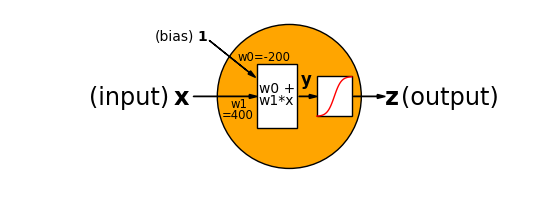

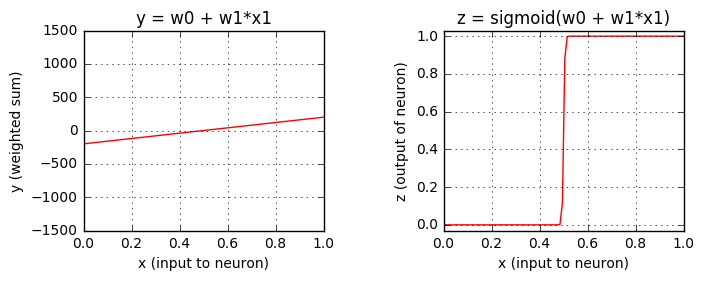

In [132]:
# Visualizing one neuron's output, changing weights w_0 and w_1
def oneNeuron1DInput(w0, w1):
    fig1 = plt.figure()
    axes1 = fig1.add_axes([0.1, 0.1, 0.8, 0.4])
    axes2 = fig1.add_axes([0.54, 0.24, 0.07, 0.12])
    # drawing inputs
    axes1.text(-1.68, 0.7, "(bias)")
    axes1.text(-1.15, 0.7, "1", weight='bold')
    axes1.arrow(-1, 0.7, 0.5, -0.4, head_width=0.05, head_length=0.1, fc='k', ec='k')
    axes1.text(-2.5, -0.1, "(input)", size='xx-large');
    axes1.text(-1.45, -0.1, "x", size='xx-large', weight='bold');
    axes1.arrow(-1.2, 0, 0.7, 0, head_width=0.05, head_length=0.1, fc='k', ec='k')
    # drawing neuron
    circle = plt.Circle((0, 0), radius=.9, fc='#ffa500'); axes1.add_patch(circle)
    axes1.text(-0.65, 0.45, "w0="+str(w0), size='small')
    axes1.text(-0.74, -0.14, "w1", size='small')
    axes1.text(-0.84, -0.28, "="+str(w1), size='small')
    wRectangle = plt.Rectangle((-0.4, -0.4), 0.5, 0.8, fc='w'); axes1.add_patch(wRectangle)
    axes1.text(-0.38, 0.05, "w0 +")
    axes1.text(-0.38, -0.1, "w1*x")
    axes1.arrow(0.12, 0, 0.13, 0, head_width=0.05, head_length=0.1, fc='k', ec='k')
    axes1.text(0.14, 0.15, "y", size='large', weight='bold')
    axes1.arrow(0.8, 0, 0.3, 0, head_width=0.05, head_length=0.1, fc='k', ec='k')
    # drawing output
    axes1.text(1.2, -0.1, "z", size='xx-large', weight='bold');
    axes1.text(1.4, -0.1, "(output)", size='xx-large');
    axes1.axis('scaled')
    axes1.grid();
    axes1.set_xlim([-3, 3])
    axes1.set_ylim([-1, 1])
    axes1.axis('off');
    # drawing sigmoid rectangle
    rectangle = plt.Rectangle((-5, 0), 10, 1, fc='w')
    axes2.add_patch(rectangle)
    sigmoidX = np.linspace(-5, 5, 100)
    axes2.plot(sigmoidX, sigmoid(sigmoidX), 'r')
    #axes2.axis('scaled')
    axes2.set_xlim([-6, 6])
    axes2.set_ylim([-0.1, 1.1])
    axes2.axis('off');
    
    # drawing graphs
    x = np.linspace(0.0, 1.0, 100)
    f, (ax1, ax2) = plt.subplots(1, 2, sharey=False)
    # graph1
    ax1.plot(x, w0 + w1*x, 'r');
    ax1.set_position([0.1, 0.1, 0.4, 0.5])
    ax1.grid()
    ax1.set_xlim([0,1])
    ax1.set_ylim([-1500,1500])
    ax1.set_xlabel("x (input to neuron)")
    ax1.set_ylabel("y (weighted sum)")
    ax1.set_title("y = w0 + w1*x1")
    # graph2
    ax2.plot(x, sigmoid(w0 + w1*x), 'r');
    ax2.set_position([0.7, 0.1, 0.4, 0.5])
    ax2.grid()
    ax2.set_xlim([0,1])
    ax2.set_ylim([-0.03,1.03])
    ax2.set_xlabel("x (input to neuron)")
    ax2.set_ylabel("z (output of neuron)")
    ax2.set_title("z = sigmoid(w0 + w1*x1)")
    

interact(oneNeuron1DInput, w0=widgets.IntSlider(min=-1000, max=1000, step=50, value=-200), w1=widgets.IntSlider(min=-1000, max=1000, step=50, value=400));

As a standard, an input can range from 0 to 1 (to normalize different-ranged dimensions of the input). In addition to the input, there is a bias added to provide more flexibility to the output. This bias value is always 1.

The first operation done by the neuron is to multiply its inputs (including the bias value) with some weights, and sum those values:

$$y = w_{0} + w_{1}*x$$

The second operation is to make y non-linear. A common function that is used to non-linearity is the sigmoid function:

$$z = sigmoid(y) = \frac{1}{1+e^{-y}} = \frac{1}{1+e^{-(w_{0} + w_{1}*x)}}$$

This way, the output (z) always lies in the range of 0 to 1.


## Visualizing one neuron's action with a multi-dimensional input

Suppose our input has $d_{i}$ dimensions. For the sake of visualization, we shall assume $d_{i} = 2$, meaning our inputs are 2-dimensional points (presumably on a Euclidean plane). Let's visualize the output of a neuron fed with a 2-dimensional input:

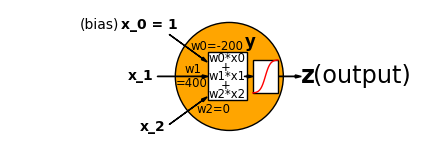

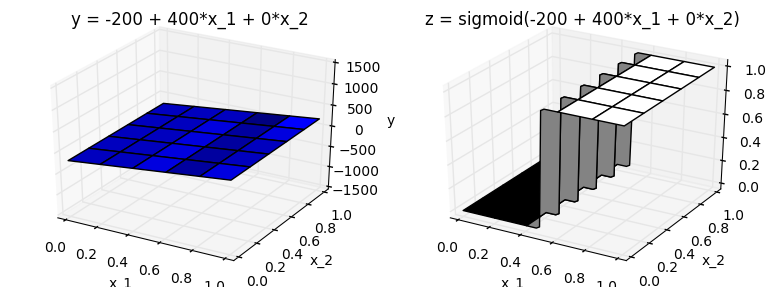

In [133]:
# Visualizing one neuron's output, changing weights w_0, w_1 and w_2
def oneNeuron2DInput(w0, w1, w2):
    fig1 = plt.figure()
    axes1 = fig1.add_axes([0.1, 0.1, 0.8, 0.3])
    axes2 = fig1.add_axes([0.535, 0.2, 0.05, 0.1])
    # drawing x_0, x_1, x_2
    axes1.text(-2.5, 0.8, "(bias)")
    axes1.text(-1.8, 0.8, "x_0 = 1", weight='bold')
    axes1.arrow(-1, 0.7, 0.55, -0.4, head_width=0.05, head_length=0.1, fc='k', ec='k')
    axes1.text(-1.7, -0.05, "x_1", weight='bold');
    axes1.arrow(-1.2, 0, 0.75, 0, head_width=0.05, head_length=0.1, fc='k', ec='k')
    axes1.text(-1.5, -0.9, "x_2", weight='bold')
    axes1.arrow(-1, -0.8, 0.55, 0.4, head_width=0.05, head_length=0.1, fc='k', ec='k')
    # drawing neuron
    circle = plt.Circle((0, 0), radius=.9, fc='#ffa500'); axes1.add_patch(circle)
    axes1.text(-0.65, 0.45, "w0="+str(w0), size='small')
    axes1.text(-0.74, 0.06, "w1", size='small')
    axes1.text(-0.9, -0.16, "="+str(w1), size='small')
    axes1.text(-0.55, -0.6, "w2="+str(w2), size='small')
    wRectangle = plt.Rectangle((-0.35, -0.4), 0.65, 0.8, fc='w'); axes1.add_patch(wRectangle)
    axes1.text(-0.35, 0.25, "w0*x0", size='small'); axes1.text(-0.15, 0.1, "+", size='small')
    axes1.text(-0.35, -0.05, "w1*x1", size='small'); axes1.text(-0.15, -0.2, "+", size='small')
    axes1.text(-0.35, -0.35, "w2*x2", size='small')
    axes1.arrow(0.25, 0, 0.05, 0, head_width=0.05, head_length=0.1, fc='k', ec='k')
    axes1.text(0.26, 0.5, "y", size='large', weight='bold')
    axes1.arrow(0.8, 0, 0.3, 0, head_width=0.05, head_length=0.1, fc='k', ec='k')
    # drawing output
    axes1.text(1.2, -0.1, "z", size='xx-large', weight='bold');
    axes1.text(1.4, -0.1, "(output)", size='xx-large');
    axes1.axis('scaled')
    axes1.grid();
    axes1.set_xlim([-3, 3])
    axes1.set_ylim([-1, 1])
    axes1.axis('off');
    # drawing sigmoid rectangle
    rectangle = plt.Rectangle((-5, 0), 10, 1, fc='w')
    axes2.add_patch(rectangle)
    sigmoidX = np.linspace(-5, 5, 100)
    axes2.plot(sigmoidX, sigmoid(sigmoidX), 'r')
    #axes2.axis('scaled')
    axes2.set_xlim([-6, 6])
    axes2.set_ylim([-0.1, 1.1])
    axes2.axis('off');
    
    # drawing graphs
    x1 = np.linspace(0.0, 1.0, 50)
    x2 = np.linspace(0.0, 1.0, 50)
    X1,X2 = np.meshgrid(x1, x2)
    fig = plt.figure(figsize=(8, 3))
    # graph1
    ax1 = fig.add_subplot(1, 2, 1, projection='3d')
    #p = ax.plot_surface(X, Y, Z, rstride=4, cstride=4, linewidth=0)
    ax1.plot_surface(X1, X2, (w0 + w1*X1 + w2*X2))
    ax1.set_xlim([-0.03,1.03]); ax1.set_ylim([-0.03,1.03]); ax1.set_zlim([-1500,1500])
    ax1.set_xlabel("x_1"); ax1.set_ylabel("x_2"); ax1.set_zlabel("y")
    ax1.set_title("y = "+str(w0)+" + "+str(w1)+"*x_1 + "+str(w2)+"*x_2")
    # graph2
    ax2 = fig.add_subplot(1, 2, 2, projection='3d')
    #p = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=matplotlib.cm.gist_heat, linewidth=0, antialiased=False)
    ax2.plot_surface(X1, X2, sigmoid(w0 + w1*X1 + w2*X2), cmap=cm.gray);
    ax2.set_xlim([-0.03,1.03]); ax2.set_ylim([-0.03,1.03]); ax2.set_zlim([-0.03,1.03])
    ax2.set_xlabel("x_1"); ax2.set_ylabel("x_2"); ax2.set_zlabel("z")
    ax2.set_title("z = sigmoid("+str(w0)+" + "+str(w1)+"*x_1 + "+str(w2)+"*x_2)")
    fig.tight_layout()

interact(oneNeuron2DInput, w0=widgets.IntSlider(min=-1000, max=1000, step=50, value=-200), w1=widgets.IntSlider(min=-1000, max=1000, step=50, value=400), w2=widgets.IntSlider(min=-1000, max=1000, step=50, value=0));

Init values of weights same

Try tweaking the weights w0, w1, w2 to see the changes to the output of the neuron, for all possibilities of x1 and x2

To keep things simple, let us try to implement logic gates through neural networks.

Can you implement OR? AND? NOR? NAND? XOR?

## Ill-posed problem

As can be seen, there are infinite solutions to the logic-gate problems. 

So, neural networks are ill-posed. It is also difficult to arrive at a solution, unless there are loads of inputs.

## Multi-dimensional input - matrix operations

Suppose our input has $d_{i}$ dimensions. For the sake of visualization, we shall assume $d_{i} = 2$, meaning our inputs are 2-dimensional points (presumably on a Euclidean plane).

Also suppose that 



- ## Solving Classification problems using one neuron

To solve a simple classification problem using just one neuron, we can try to train the weights of the neuron to give specific outputs for specific values of inputs. For example, say the points $\{0, 0.01, 0.07\}$ belong to one class, and the points $\{0.03, 0.05, 0.08\}$ belong to another class.

- ## Non-linear activations

For classification problems, it is imperative that we use non-linear activation functions after calculating the weighted sum of the input. This is because, if a neuron only outputs a linear combination of its inputs, it would be very difficult to classify those classes that do not have a linear decision boundary between.

The plot of the output of a weighted sumFor example, the XOR function: $\{ (0,0), (1,1) \} == 0; \{ (0,1), (1,0) \} == 1$, cannot have a linear boundary that is able to distinguish all of these 4 points into their classes correctly.

Apart from sigmoid, other non-linear activations like ReLU (REctified Linear Unit), tanh can also be used.

If there are more inpu

In [135]:
HTML('''<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#999; background:#fff;">
Created with Jupyter.
</footer>''')